## 이미지 처리 딥러닝
# 전이학습

### 유명한 CNN 아키텍처
- https://m.blog.naver.com/takion7/221633332572
> - LeNet
> - AlexNet
> - Inception (GoogleNet)
> - VGGNet (VGG16)
> - ResNet
> - Xception (Inception 기반)

- VGGNet
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png' />

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! cp /content/drive/MyDrive/cats_and_dogs_small.zip .

In [3]:
! unzip cats_and_dogs_small.zip

Archive:  cats_and_dogs_small.zip
   creating: cats_and_dogs_small/
   creating: cats_and_dogs_small/test/
   creating: cats_and_dogs_small/test/cats/
  inflating: cats_and_dogs_small/test/cats/cat.1500.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1501.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1502.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1503.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1504.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1505.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1506.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1507.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1508.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1509.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1510.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1511.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1512.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1513.jpg  
  inflating: cats_and_dogs_small/test

In [4]:
! ls

cats_and_dogs_small  cats_and_dogs_small.zip  drive  sample_data


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
dir(keras.applications)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'densenet',
 'efficientnet',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

### VGG16 분류

In [ ]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')
    # input_shape=(224, 224, 3)

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

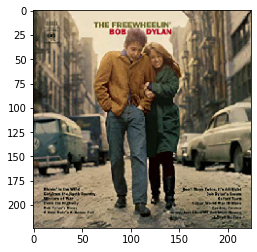

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

bob = load_img('bob_dylan.jpg', target_size=(224, 224))
bob = img_to_array(bob)
plt.imshow(bob/255.)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

input_image = np.expand_dims(bob, axis=0)
input_image = preprocess_input(input_image)

input_image.shape, input_image.max(), input_image.min()

((1, 224, 224, 3), 138.22101, -123.68)

In [8]:
from tensorflow.keras.applications.vgg16 import decode_predictions

In [ ]:
result = model.predict(input_image)
result.shape

(1, 1000)

In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions

decode_predictions(result, top=10)

[[('n03796401', 'moving_van', 0.19718817),
  ('n02930766', 'cab', 0.09000346),
  ('n03977966', 'police_van', 0.066673994),
  ('n03769881', 'minibus', 0.05160549),
  ('n03417042', 'garbage_truck', 0.047403168),
  ('n03770679', 'minivan', 0.030321049),
  ('n02701002', 'ambulance', 0.026834961),
  ('n03903868', 'pedestal', 0.016716432),
  ('n03384352', 'forklift', 0.016439527),
  ('n04507155', 'umbrella', 0.015800048)]]

In [ ]:
np.argsort(result[0])[::-1][:10]

array([675, 468, 734, 654, 569, 656, 407, 708, 561, 879], dtype=int64)

- 중간층 출력이미지 확인

In [ ]:
for i,layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [ ]:
#block3_conv1 = vgg16.get_layer('block3_conv1')
activation_model = keras.models.Model(inputs=model.input,
                        outputs=model.layers[1].output) # block3_conv1

In [ ]:
result = activation_model.predict(input_image)
result.shape

(1, 224, 224, 64)

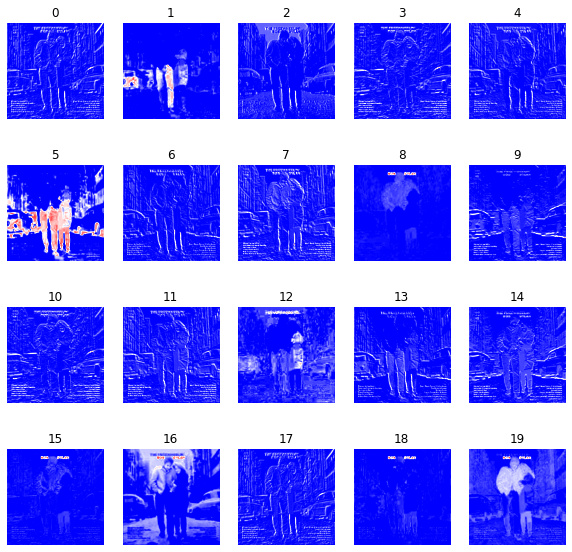

In [ ]:
plt.figure(figsize=[10,10])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(result[0,:,:,i], cmap='bwr')
    plt.axis('off')
    plt.title(i)

### VGG16 전이학습

In [ ]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',
                            input_shape=(150,150,3))

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255)

generator = datagen.flow_from_directory('cats_and_dogs_small/train',
                    target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
X_train = np.zeros([2000,4,4,512])
y_train = np.zeros(2000)

for step in range(100): # 2000//20
    X_batch, y_batch = generator.next()
    pred = vgg16.predict(X_batch)
    
    X_train[20*step:20*(step+1)] = pred
    y_train[20*step:20*(step+1)] = y_batch
    print('.', end='')
    
X_train.shape, y_train.shape

....................................................................................................

((2000, 4, 4, 512), (2000,))

In [ ]:
np.savez('cats_and_dogs_vgg.npz', x=X_train, y=y_train)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(4,4,512)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=20,
                   validation_split=0.2)

Epoch 1/30
80/80 [==============================] - 1s 10ms/step - loss: 0.6863 - acc: 0.7037 - val_loss: 0.3387 - val_acc: 0.8600
Epoch 2/30
80/80 [==============================] - 1s 7ms/step - loss: 0.2722 - acc: 0.8950 - val_loss: 0.2796 - val_acc: 0.8775
Epoch 3/30
80/80 [==============================] - 1s 8ms/step - loss: 0.1916 - acc: 0.9191 - val_loss: 0.3013 - val_acc: 0.8825
Epoch 4/30
80/80 [==============================] - 1s 11ms/step - loss: 0.1620 - acc: 0.9389 - val_loss: 0.2877 - val_acc: 0.8800
Epoch 5/30
80/80 [==============================] - 1s 13ms/step - loss: 0.1226 - acc: 0.9473 - val_loss: 0.3123 - val_acc: 0.8775
Epoch 6/30
80/80 [==============================] - 1s 13ms/step - loss: 0.1272 - acc: 0.9526 - val_loss: 0.3323 - val_acc: 0.8775
Epoch 7/30
80/80 [==============================] - 1s 13ms/step - loss: 0.0822 - acc: 0.9674 - val_loss: 0.3245 - val_acc: 0.8875
Epoch 8/30
80/80 [==============================] - 1s 14ms/step - loss: 0.0627 - acc

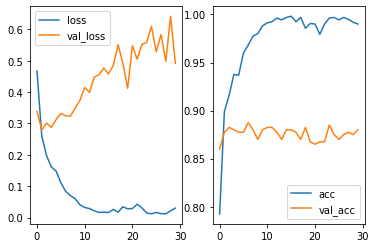

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### Inception

In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [11]:
base_model = InceptionV3(weights='imagenet', include_top=True)

96116736/96112376 [==============================] - 1s 0us/step


In [12]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for i,layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_3 [(None, 299, 299, 3)]
1 conv2d (None, 149, 149, 32)
2 batch_normalization (None, 149, 149, 32)
3 activation (None, 149, 149, 32)
4 conv2d_1 (None, 147, 147, 32)
5 batch_normalization_1 (None, 147, 147, 32)
6 activation_1 (None, 147, 147, 32)
7 conv2d_2 (None, 147, 147, 64)
8 batch_normalization_2 (None, 147, 147, 64)
9 activation_2 (None, 147, 147, 64)
10 max_pooling2d (None, 73, 73, 64)
11 conv2d_3 (None, 73, 73, 80)
12 batch_normalization_3 (None, 73, 73, 80)
13 activation_3 (None, 73, 73, 80)
14 conv2d_4 (None, 71, 71, 192)
15 batch_normalization_4 (None, 71, 71, 192)
16 activation_4 (None, 71, 71, 192)
17 max_pooling2d_1 (None, 35, 35, 192)
18 conv2d_8 (None, 35, 35, 64)
19 batch_normalization_8 (None, 35, 35, 64)
20 activation_8 (None, 35, 35, 64)
21 conv2d_6 (None, 35, 35, 48)
22 conv2d_9 (None, 35, 35, 96)
23 batch_normalization_6 (None, 35, 35, 48)
24 batch_normalization_9 (None, 35, 35, 96)
25 activation_6 (None, 35, 35, 48)
26 activation_9 (None, 35, 35, 96)
27 aver

In [ ]:
base_model.get_layer('input_1').output_shape

[(None, 299, 299, 3)]

- Inception-v3 의 입력이미지는 299x299x3 이고,
- -1 ~ 1 사이의 실수값으로 전처리한다

In [ ]:
img = keras.preprocessing.image.load_img('bob_dylan.jpg', target_size=(299,299))
bob = keras.preprocessing.image.img_to_array(img)
bob = ((bob/255.)-0.5)*2

In [ ]:
bob.shape, bob.max(), bob.min(), bob.dtype

((299, 299, 3), 1.0, -1.0, dtype('float32'))

In [ ]:
out = base_model.predict(bob.reshape(1,299,299,3))

In [ ]:
out.argmax(axis=1)

array([608], dtype=int64)

In [ ]:
decode_predictions(out, top=10)

[[('n03594734', 'jean', 0.1215592),
  ('n03404251', 'fur_coat', 0.100700945),
  ('n02992529', 'cellular_telephone', 0.056560207),
  ('n02667093', 'abaya', 0.04886632),
  ('n02971356', 'carton', 0.030788137),
  ('n02930766', 'cab', 0.025535533),
  ('n04350905', 'suit', 0.024050219),
  ('n02672831', 'accordion', 0.017367432),
  ('n03110669', 'cornet', 0.016537175),
  ('n04356056', 'sunglasses', 0.01606815)]]

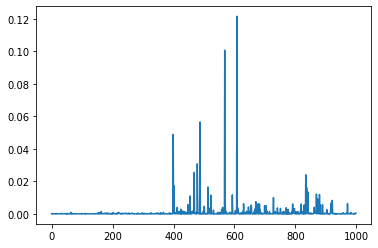

In [ ]:
plt.plot(out.ravel())

In [13]:
base_model = InceptionV3(weights='imagenet', include_top=False,
                        input_shape=(299,299,3))

87916544/87910968 [==============================] - 1s 0us/step


In [14]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [15]:
for i,layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_2 [(None, 299, 299, 3)]
1 conv2d_94 (None, 149, 149, 32)
2 batch_normalization_94 (None, 149, 149, 32)
3 activation_94 (None, 149, 149, 32)
4 conv2d_95 (None, 147, 147, 32)
5 batch_normalization_95 (None, 147, 147, 32)
6 activation_95 (None, 147, 147, 32)
7 conv2d_96 (None, 147, 147, 64)
8 batch_normalization_96 (None, 147, 147, 64)
9 activation_96 (None, 147, 147, 64)
10 max_pooling2d_4 (None, 73, 73, 64)
11 conv2d_97 (None, 73, 73, 80)
12 batch_normalization_97 (None, 73, 73, 80)
13 activation_97 (None, 73, 73, 80)
14 conv2d_98 (None, 71, 71, 192)
15 batch_normalization_98 (None, 71, 71, 192)
16 activation_98 (None, 71, 71, 192)
17 max_pooling2d_5 (None, 35, 35, 192)
18 conv2d_102 (None, 35, 35, 64)
19 batch_normalization_102 (None, 35, 35, 64)
20 activation_102 (None, 35, 35, 64)
21 conv2d_100 (None, 35, 35, 48)
22 conv2d_103 (None, 35, 35, 96)
23 batch_normalization_100 (None, 35, 35, 48)
24 batch_normalization_103 (None, 35, 35, 96)
25 activation_100 (None, 35, 35, 48)
26 

In [16]:
base_model.trainable = False

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(rescale=1/255.)
# train_datagen = ImageDataGenerator(rescale=1/255.,
#    preprocessing_function=lambda x: (x-0.5)*2.)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [20]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit_generator(train_generator, epochs=20, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 53s 159ms/step - loss: 0.5715 - acc: 0.7309 - val_loss: 0.3650 - val_acc: 0.9570
Epoch 2/20
100/100 [==============================] - 14s 144ms/step - loss: 0.3216 - acc: 0.9603 - val_loss: 0.2138 - val_acc: 0.9820
Epoch 3/20
100/100 [==============================] - 14s 144ms/step - loss: 0.1882 - acc: 0.9863 - val_loss: 0.1390 - val_acc: 0.9870
Epoch 4/20
100/100 [==============================] - 14s 145ms/step - loss: 0.1314 - acc: 0.9840 - val_loss: 0.1004 - val_acc: 0.9880
Epoch 5/20
100/100 [==============================] - 14s 144ms/step - loss: 0.0901 - acc: 0.9909 - val_loss: 0.0792 - val_acc: 0.9880
Epoch 6/20
100/100 [==============================] - 14s 144ms/step - loss: 0.0796 - acc: 0.9856 - val_loss: 0.0662 - val_acc: 0.9880
Epoch 7/20
100/100 [==============================] - 14s 143ms/step - loss: 0.0568 - acc: 0.9934 - val_loss: 0.0577 - val_acc: 0.9910
Epoch 8/20
100/100 [==============================] - 1

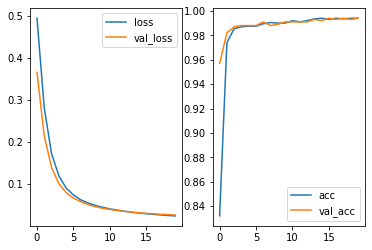

In [22]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

```
Epoch 1/10
100/100 [==============================] - 3369s 34s/step - loss: 0.5637 - acc: 0.7610 - val_loss: 0.3421 - val_acc: 0.9700
Epoch 2/10
100/100 [==============================] - 3332s 33s/step - loss: 0.3107 - acc: 0.9741 - val_loss: 0.1992 - val_acc: 0.9870
Epoch 3/10
100/100 [==============================] - 3341s 34s/step - loss: 0.1838 - acc: 0.9828 - val_loss: 0.1286 - val_acc: 0.9880
Epoch 4/10
100/100 [==============================] - 3319s 33s/step - loss: 0.1180 - acc: 0.9913 - val_loss: 0.0935 - val_acc: 0.9900
Epoch 5/10
100/100 [==============================] - 3322s 33s/step - loss: 0.0944 - acc: 0.9885 - val_loss: 0.0738 - val_acc: 0.9910
Epoch 6/10
100/100 [==============================] - 3322s 33s/step - loss: 0.0775 - acc: 0.9897 - val_loss: 0.0617 - val_acc: 0.9920
Epoch 7/10
100/100 [==============================] - 3320s 33s/step - loss: 0.0587 - acc: 0.9919 - val_loss: 0.0536 - val_acc: 0.9930
Epoch 8/10
100/100 [==============================] - 3330s 33s/step - loss: 0.0533 - acc: 0.9903 - val_loss: 0.0479 - val_acc: 0.9930
Epoch 9/10
100/100 [==============================] - 3359s 34s/step - loss: 0.0469 - acc: 0.9915 - val_loss: 0.0438 - val_acc: 0.9940
Epoch 10/10
100/100 [==============================] - 3352s 34s/step - loss: 0.0403 - acc: 0.9930 - val_loss: 0.0404 - val_acc: 0.9940
```